In [1]:
# import packages
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from pmdarima.arima import auto_arima

# for calculation
from math import sqrt
from sklearn.metrics import mean_squared_error

# to plot within notebook
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data80 = pd.read_csv('105v2.csv', parse_dates=True, index_col='DateTime',encoding="windows-1252") # или 105
data80.head(5)

,AffinityIndex,SerialNumber,H,Tmean,WmeanH,WindDirectionH(Â°),WminH,WmaxH,WmeanV,AtmosphericPressure,RelativeHumidity,TdewPoint(Â°C),WaterVaporElasticity,AbsolutusHumidity,DensityofAir,SpeedofSoundinAir
DateTime,,,,,,,,,,,,,,,,
2017-07-22 00:01:00,6,12427AMK-03,15,15.86,0.20,94.53,0.01,0.44,-0.13,750.45,100.0,15.86,17.99,14.53,1.1954,342.12
2017-07-22 00:02:00,6,12427AMK-03,15,15.88,0.28,104.28,0.15,0.53,-0.19,750.45,100.0,15.88,18.01,14.55,1.1953,342.14
2017-07-22 00:03:00,6,12427AMK-03,15,15.87,0.23,68.53,0.11,0.36,-0.19,750.45,100.0,15.87,17.99,14.54,1.1954,342.13
2017-07-22 00:04:00,6,12427AMK-03,15,15.95,0.17,47.04,0.01,0.33,-0.18,750.45,100.0,15.95,18.09,14.62,1.1950,342.18
2017-07-22 00:05:00,6,12427AMK-03,15,16.01,0.06,11.99,0.01,0.22,-0.19,750.45,100.0,16.01,18.16,14.68,1.1947,342.22


In [3]:
data80 = data80.groupby('DateTime')['Tmean'].sum().reset_index()

In [4]:
data80 = data80.set_index('DateTime')
data80.index

DatetimeIndex(['2017-07-22 00:01:00', '2017-07-22 00:02:00',
               '2017-07-22 00:03:00', '2017-07-22 00:04:00',
               '2017-07-22 00:05:00', '2017-07-22 00:06:00',
               '2017-07-22 00:07:00', '2017-07-22 00:08:00',
               '2017-07-22 00:09:00', '2017-07-22 00:10:00',
               ...
               '2020-04-09 23:50:00', '2020-04-09 23:51:00',
               '2020-04-09 23:52:00', '2020-04-09 23:53:00',
               '2020-04-09 23:54:00', '2020-04-09 23:55:00',
               '2020-04-09 23:56:00', '2020-04-09 23:57:00',
               '2020-04-09 23:58:00', '2020-04-09 23:59:00'],
              dtype='datetime64[ns]', name='DateTime', length=1183038, freq=None)

In [5]:
df = data80['Tmean'].resample('MS').mean() # MS - месяц, D - день


In [6]:
# train = df[:36] 1111111111
# valid = df[12:]


train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

In [7]:
train.shape, valid.shape


((23,), (11,))

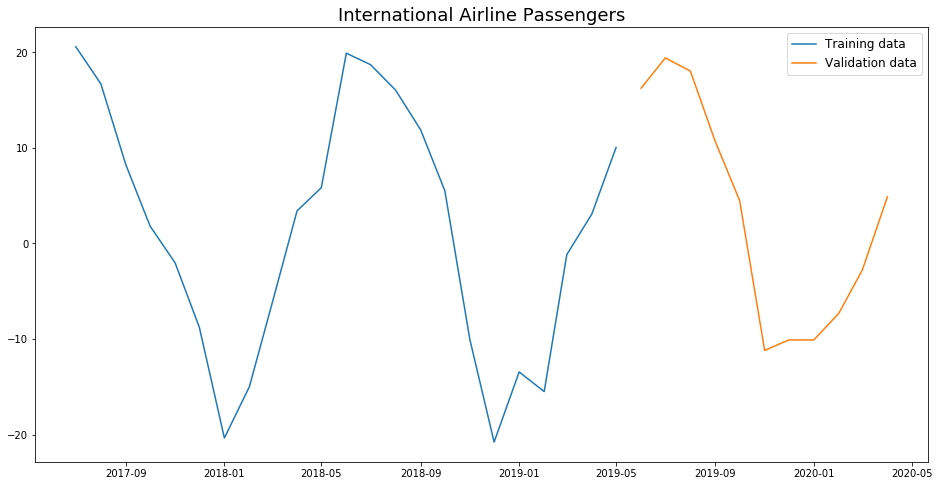

In [8]:
# plot the graph
plt.figure(figsize=(16,8))
# plt.xlabel("Date")
# plt.ylabel("Passengers")
plt.title("International Airline Passengers", fontsize=18)
plt.plot(train.index, train, label="Training data")
plt.plot(valid.index, valid, label="Validation data")
plt.legend(prop={"size": 12})
plt.savefig("passengers.png", bbox_inches="tight")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


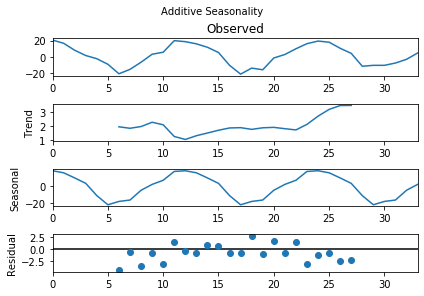

In [9]:
# Additive Seasonality

add_seasonality = sm.tsa.seasonal_decompose(df.values,freq=12,model="additive")
fig = add_seasonality.plot()
fig.text(0.5, 0.99, "Additive Seasonality", ha="center")
plt.savefig("additive_seasonality.png", bbox_inches="tight")
plt.show()

In [10]:
# fit the model
%time
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Wall time: 0 ns
Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=163.183, BIC=169.996, Time=0.096 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=186.647, BIC=188.918, Time=0.004 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=166.626, BIC=170.033, Time=0.012 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=172.958, BIC=176.364, Time=0.015 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=184.860, BIC=185.996, Time=0.003 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=164.182, BIC=169.860, Time=0.048 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=148.656, BIC=154.334, Time=0.077 seconds
Near non-invertible roots for order (2, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(3,0,2)x(0,0,0,0) [intercept=True]; AIC=152.437, BIC=160.386, Time=0.129 seconds
Near non-invertible roots for order (3, 0, 2)(0, 0, 0, 0); set

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [11]:
# make predictions
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast ,index = valid.index, columns=['prediction'])

In [12]:
print(forecast.shape, valid.shape)
forecast.head()

(11, 1) (11,)


,prediction
DateTime,
2019-06-01,19.329000
2019-07-01,19.396386
2019-08-01,15.741385
2019-09-01,8.173749
2019-10-01,-1.199746


In [13]:
# calculate rmse
rms_arima = sqrt(mean_squared_error(valid, forecast))
print("RMSE for Auto ARIMA = {}".format(rms_arima))

RMSE for Auto ARIMA = 3.5003222207524063


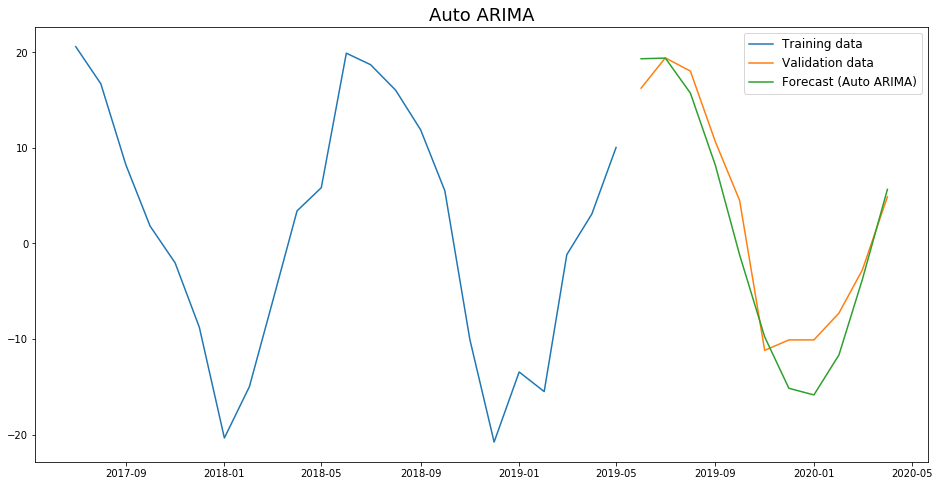

In [14]:
# plot the result
plt.figure(figsize=(16,8))
# plt.xlabel("Date")
# plt.ylabel("Passengers")
plt.title("Auto ARIMA", fontsize=18)
plt.plot(train.index, train, label="Training data")
plt.plot(valid.index, valid, label="Validation data")
plt.plot(forecast.index, forecast["prediction"], label="Forecast (Auto ARIMA)")
plt.legend(prop={"size": 12})
plt.savefig("auto_arima.png", bbox_inches="tight")
plt.show()